C:\Users\Lacuesta\AppData\Local\Temp\ipykernel_6344\4211576270.py:10: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  df = df.last('30D')


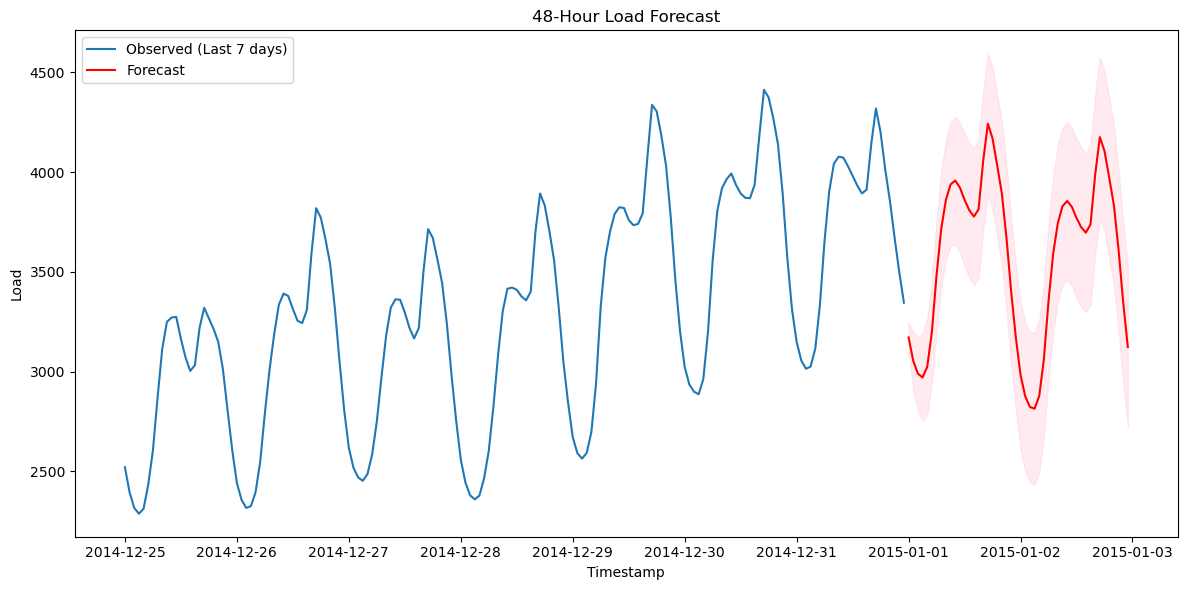

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load and prepare data
df = pd.read_csv("energy.csv", parse_dates=["timestamp"], index_col="timestamp")
df = df[['load']].asfreq('h').ffill()

# Use only last 30 days to speed up training
df = df.last('30D')

# Fit simpler SARIMAX
model = SARIMAX(df, order=(1, 0, 1), seasonal_order=(0, 1, 1, 24))
results = model.fit(maxiter=50, disp=False)

# Forecast next 48 hours
forecast = results.get_forecast(steps=48)
forecast_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df.index[-168:], df['load'][-168:], label='Observed (Last 7 days)')
plt.plot(forecast_mean.index, forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_mean.index,
                 conf_int.iloc[:, 0],
                 conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.title('48-Hour Load Forecast')
plt.xlabel('Timestamp')
plt.ylabel('Load')
plt.tight_layout()
plt.show()